In [2]:
import sys
sys.path.append('../../')
import numpy as np
import matplotlib
import pylab as plt

import hallgerd
from hallgerd.cpu.core import Sequential, cross_entropy_delta
from hallgerd.cpu.layers import Dense
import keras
from keras.datasets import mnist

Using TensorFlow backend.


In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float64')
x_test = x_test.astype('float64')
x_train /= 255
x_test /= 255

x_test = x_test.T
x_train = x_train.T
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
y_train = y_train.T
y_test = y_test.T

In [4]:
x_train.shape, y_train.shape

((784, 60000), (10, 60000))

9


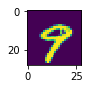

In [5]:
print(y_test[:,9].argmax(axis=0))
plt.figure(figsize=(1,1))
plt.imshow(x_test[:,9].reshape((28,28)))
plt.show()

In [6]:
x_train[:,:3000].shape

(784, 3000)

In [7]:
model = Sequential(lr=1e-3, batch_size=128, epochs=20, loss='cross_entropy')
model.add(Dense(784, 512, activation='relu'))
model.add(Dense(512, 512, activation='relu'))
model.add(Dense(512, 10, activation='softmax'))
model.fit(x_train[:,:3000], y_train[:,:3000])

100%|██████████| 20/20 [00:11<00:00,  1.68it/s]


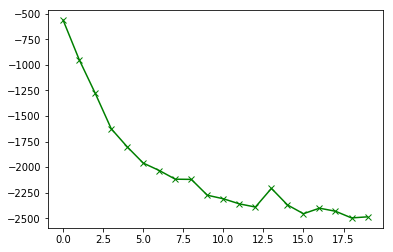

In [8]:
plt.plot(model.history['loss'], 'gx-')
plt.show()

true:  5
pred:  [5]


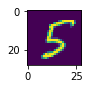

In [9]:
I = 23

print('true: ', y_test[:,I].argmax(axis=0))
print('pred: ', model(x_test[:,I:I+1]).argmax(axis=0))
plt.figure(figsize=(1,1))
plt.imshow(x_test[:,I].reshape((28,28)))
plt.show()

In [10]:
from sklearn.metrics import classification_report
yt = y_test.argmax(axis=0)
ypp = model(x_test)
yp = ypp.argmax(axis=0)
print(classification_report(yt, yp))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94       980
           1       0.91      0.99      0.94      1135
           2       0.76      0.91      0.83      1032
           3       0.82      0.87      0.85      1010
           4       0.88      0.88      0.88       982
           5       0.74      0.88      0.80       892
           6       0.93      0.84      0.88       958
           7       0.94      0.85      0.89      1028
           8       0.95      0.57      0.71       974
           9       0.83      0.85      0.84      1009

    accuracy                           0.86     10000
   macro avg       0.87      0.86      0.86     10000
weighted avg       0.87      0.86      0.86     10000



In [10]:
y_test.shape, ypp.shape

((10, 10000), (10, 10000))

In [11]:
ypp[:,0]

array([2.50517180e-04, 8.36215252e-06, 2.70801846e-04, 3.02814290e-03,
       3.45243053e-05, 2.59512307e-04, 4.14565324e-06, 9.92273316e-01,
       8.42456074e-06, 3.86225263e-03])